# Notes

## Git

Go to directory you want to clone repository in then clone ```git clone https://github.com/alexanderfache6/dronezz.git```

To see any changes you have made ```git status```

To add all your changes ```git add .```

Then you can type ```git status``` and you'll see everything turn green

To commit ```git commit -m "TYPE YOUR MESSAGE HERE. SUCH AS WHAT CHANGES YOU MADE"```

Then to push to the repository ```git push origin master``` and you'll probably have to type in your GitHub password

To pull/get changes ```git pull origin master``` from within the dronezz GitHub folder.


## Code

Pull from GitHub. Let's put all of our code within the ```code``` folder. Within the "missions" folder there is a directory for every mission ("mission_1", etc). Within each directory are the following files

- mission_1_global_image.png
^ overall image

- mission_1_region_image_BUILDING.npy
- mission_1_region_image_GRASS.npy
- mission_1_region_image_GRAVEL.npy
- mission_1_region_image_SIDEWALK.npy
^ regions

- mission_1_sample_image_BUILDING.npy
- mission_1_sample_image_GRASS.npy
- mission_1_sample_image_GRAVEL.npy
- mission_1_sample_image_SIDEWALK.npy
^ "ideal" samples

Down below is a setup to load these files and to display them.

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [25]:
REGION_NAMES = ['GRASS', 'SIDEWALK', 'BUILDING', 'GRAVEL']

In [21]:
# make sure if you are only putting a single image or single title string you surround it in []

def plot_images(image_list, title_list=[], grid='off'):
    fig, axes = plt.subplots(nrows=1, ncols=len(image_list), figsize=(10*len(image_list), 10*1))
    if len(image_list) == 1:
        axes = [axes]

    for i, ax in enumerate(axes):
        ax.imshow(cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB))
        if len(title_list) > 0:
            ax.set_title(title_list[i])
        ax.axis(grid)

In [22]:
# easy way to directly get a file path using the mission number

def get_mission_file_path(mission_number):
    return '..\\missions\\mission_' + str(mission_number) + '\\mission_' + str(mission_number) + '_'

In [23]:
# function to return the region image and the sample image. Just input which mission you want and the region name

def get_region_and_sample_image(mission_number, region_name):
    region = np.load(get_mission_file_path(mission_number) + 'region_image_' + region_name + '.npy')
    sample = np.load(get_mission_file_path(mission_number) + 'sample_image_' + region_name + '.npy')
    return region, sample

# Start

In [26]:
# select mission
mission_number = 1

# load grass region
grass_region, grass_sample = get_region_and_sample_image(mission_number, 'GRASS')

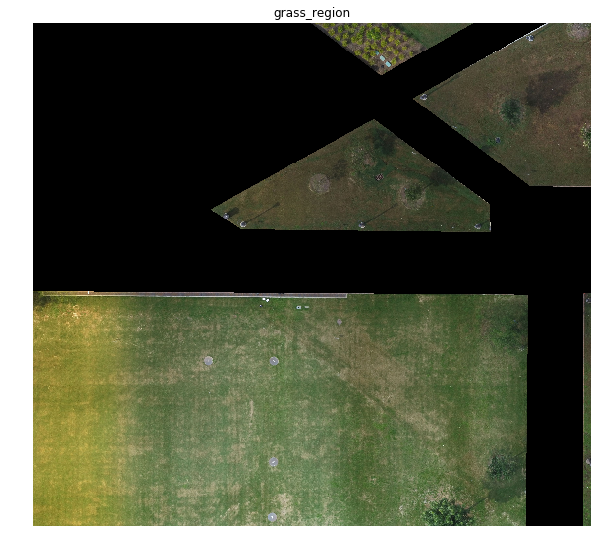

In [27]:
plot_images([grass_region], ['grass_region'])

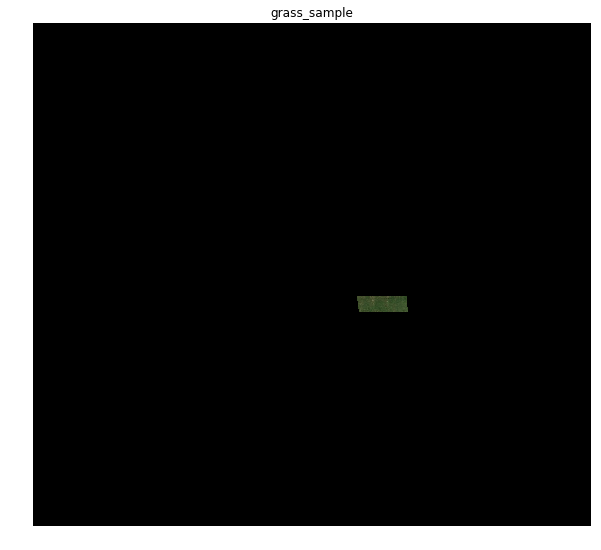

In [28]:
plot_images([grass_sample], ['grass_sample'])

# Detect Anomalies